#### <b><i>Author : Vivek Prakash</i></b>




# <center><font size="40"> Customer Segmentation Data Analysis (Clustering)</font> </center>






In [9]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler

# pca
from sklearn.decomposition import PCA

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering

# evaluations
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
cust_df = pd.read_csv("customer_segmentation_data.csv")

### Introduction

Customer segmentation is a pivotal strategy in marketing and business intelligence that involves dividing a customer base into groups of individuals who are similar in specific ways relevant to marketing, such as age, income, spending habits, and more. Clustering, a technique within unsupervised machine learning, plays a crucial role in identifying these segments automatically from the data without prior labels.

### Dataset Features
Key Features for Customer Segmentation:
1. `ID`:
ID refers to unique ID related to every customer.

1. `Age`:
Age provides insights into customer lifecycle stages, preferences, and buying behaviors. Different age groups may exhibit distinct purchasing patterns and product preferences.

2. `Income`:
Income levels help categorize customers by their spending power and propensity to purchase high-value products or services.

3. `Spending Score`:
Spending score indicates how frequently and how much a customer spends. It helps in identifying high-value customers or those with potential for increased spending.

4. `Membership Years`:
Membership years reflect customer loyalty and engagement with a brand or service over time. Longer membership durations often correlate with higher customer retention rates.

5. `Purchase Frequency`:
Purchase frequency measures how often a customer makes purchases. It distinguishes between frequent buyers and occasional shoppers.

6. `Last Purchase Amount`:
The amount spent in the last purchase provides immediate insights into recent buying behavior and transaction size.

7. `Preferred Category`:
The categories include Home & Garden, Clothing, Sports, Electronics and Groceries.

9. `Gender`:
the gender of the customer Male, Female or Others.

## Exploratory Data Analysis

In [15]:
cust_df.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [19]:
cust_df.duplicated().sum()

0

In [21]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [23]:
cust_df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [27]:
cust_df.shape

(1000, 9)

In [29]:
cust_df.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [31]:
cust_df.describe(include=object).T

,count,unique,top,freq
gender,1000,3,Male,357
preferred_category,1000,5,Electronics,215


In [33]:
cust_df['gender'].unique()

array(['Female', 'Other', 'Male'], dtype=object)

In [35]:
cust_df['preferred_category'].unique()

array(['Groceries', 'Sports', 'Clothing', 'Home & Garden', 'Electronics'],
      dtype=object)

### Data Visualization to understand the relationship between the different features

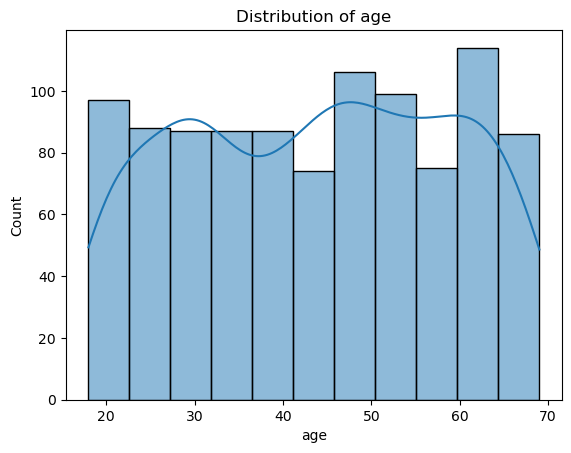

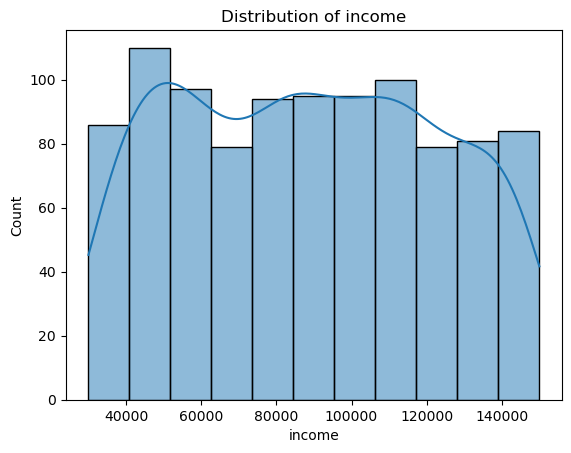

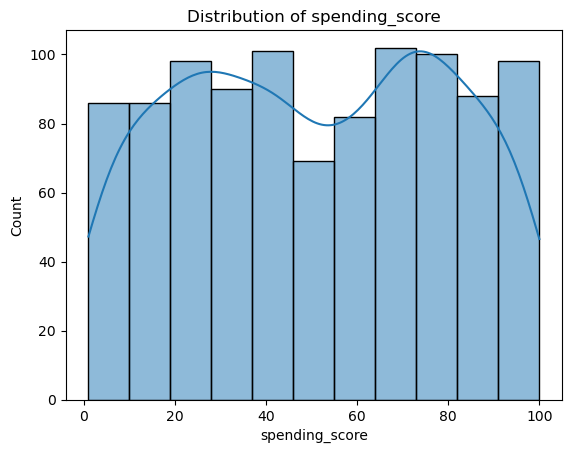

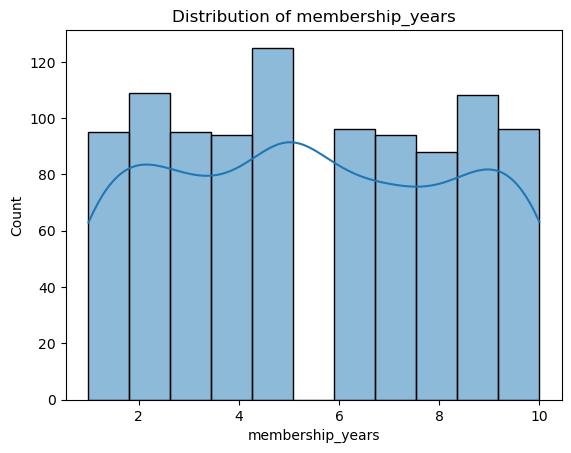

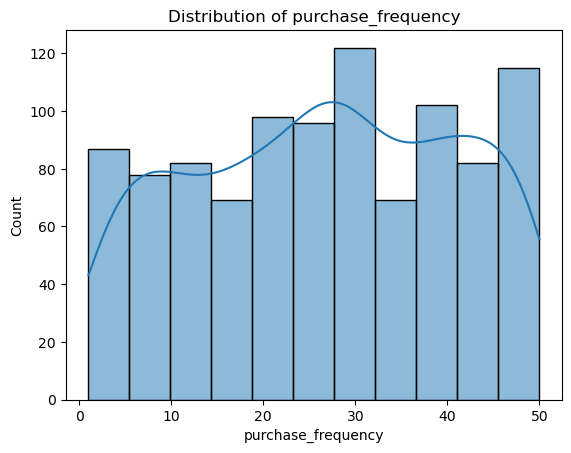

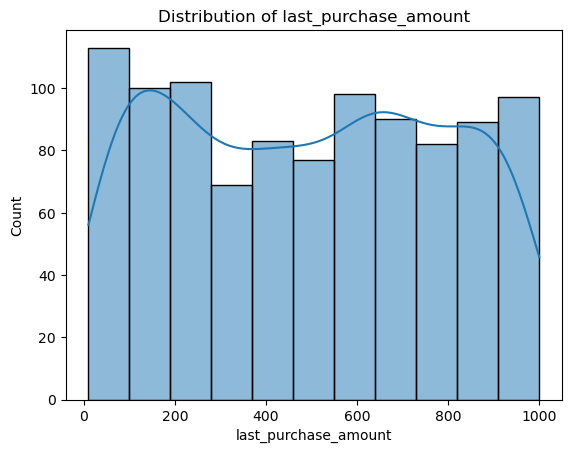

In [51]:
for i in ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']:
    sns.histplot(cust_df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

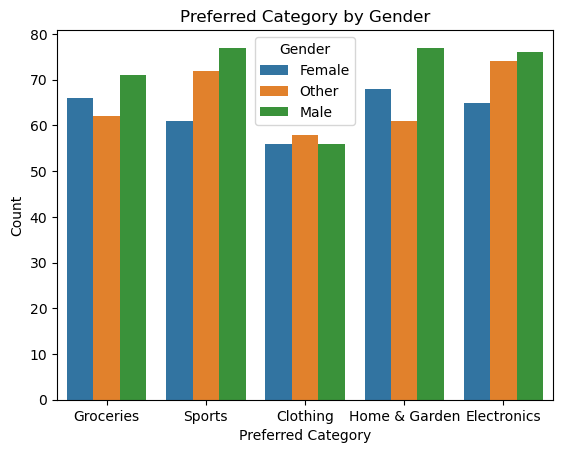

In [53]:
sns.countplot(data=cust_df, x='preferred_category', hue='gender')
plt.title('Preferred Category by Gender')
plt.xlabel('Preferred Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

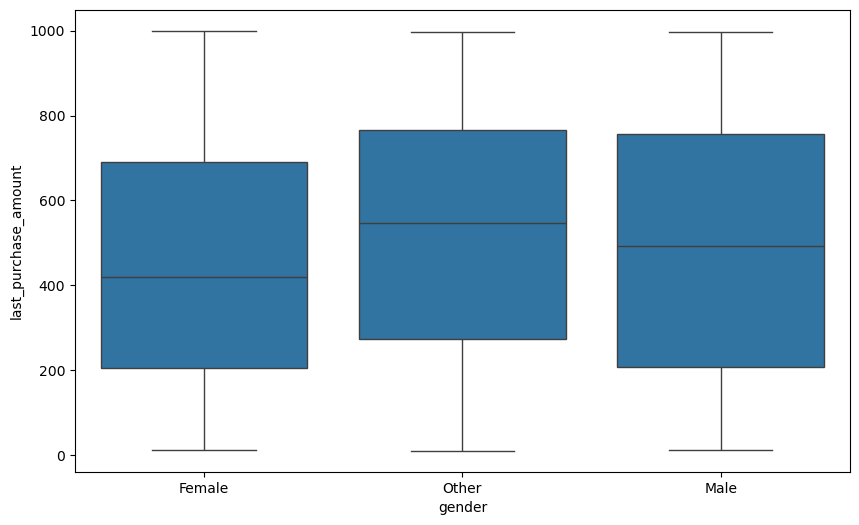

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='last_purchase_amount', data=cust_df)
plt.show()

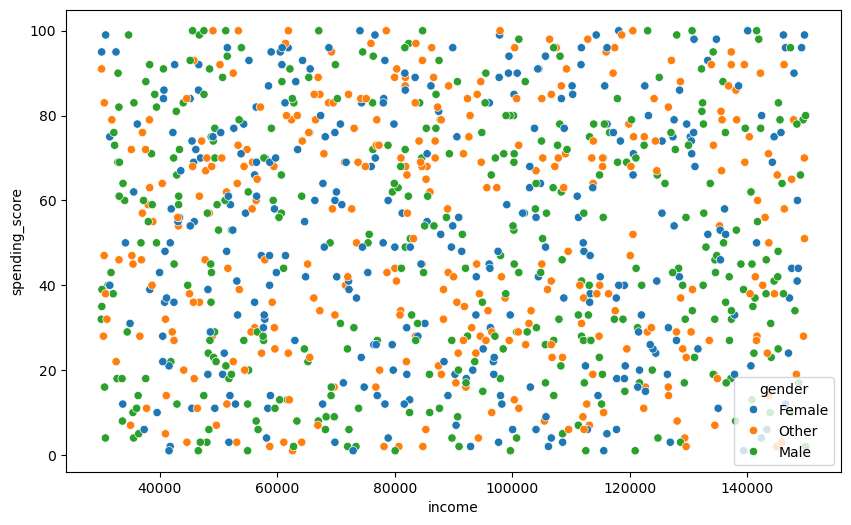

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='spending_score', hue='gender', data=cust_df)
plt.show()

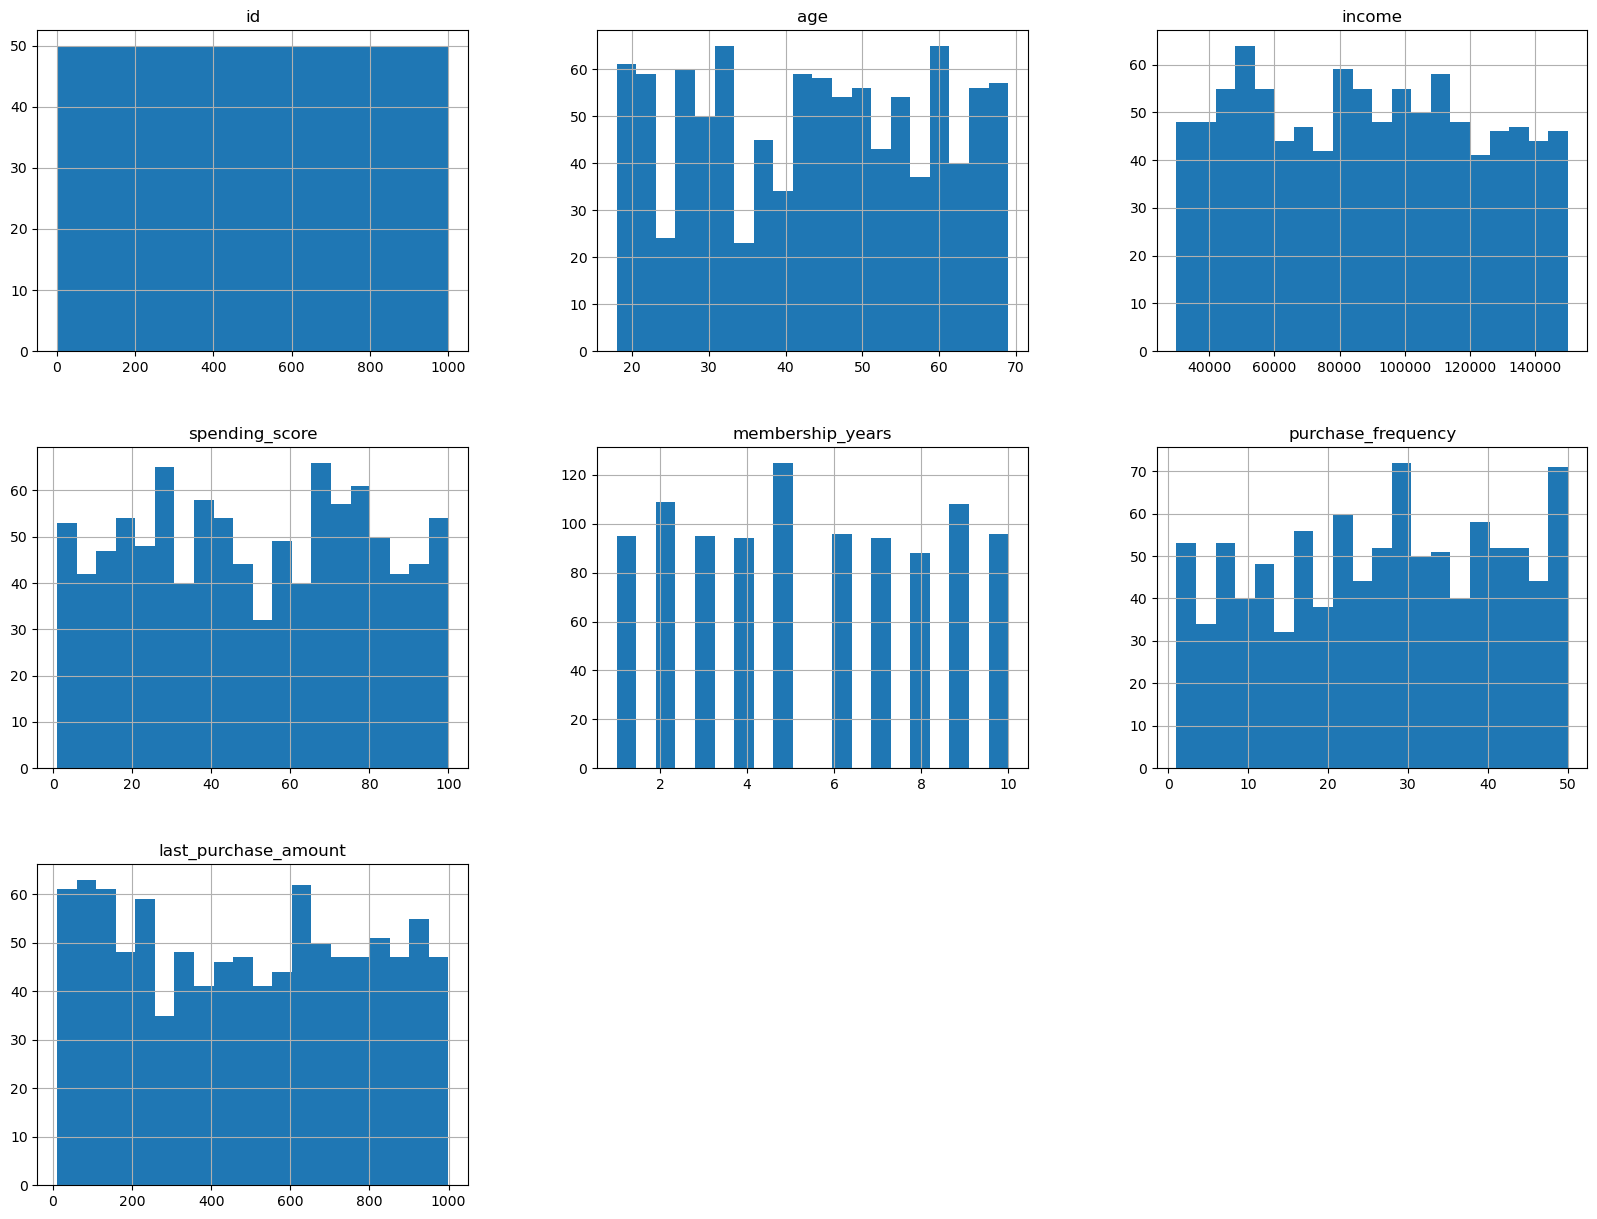

In [69]:
cust_df.hist(bins=20, figsize=(20, 15))
plt.show()

In [85]:
categorical = [i for i in cust_df.columns if cust_df[i].dtypes == 'O']
categorical

['gender', 'preferred_category']

In [89]:
numerical = [i for i in cust_df.columns if cust_df[i].dtypes != 'O']
numerical

['id',
 'age',
 'income',
 'spending_score',
 'membership_years',
 'purchase_frequency',
 'last_purchase_amount']

<Axes: >

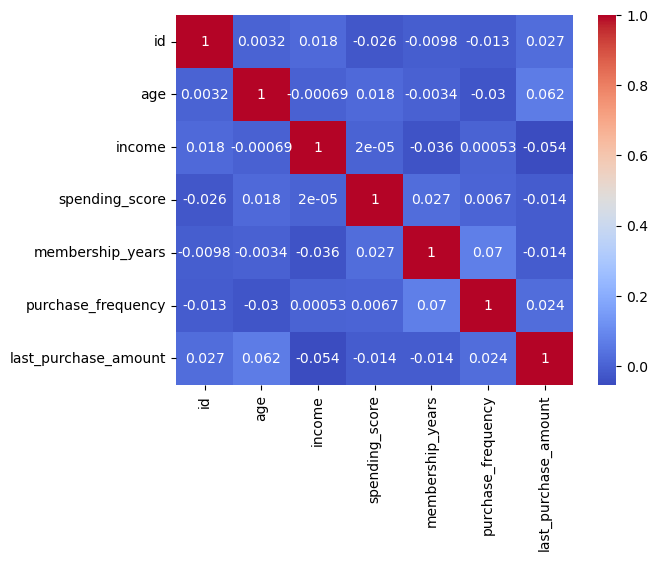

In [121]:
c1=cust_df[numerical].corr()
sns.heatmap(c1 , annot = True,cmap ="coolwarm")

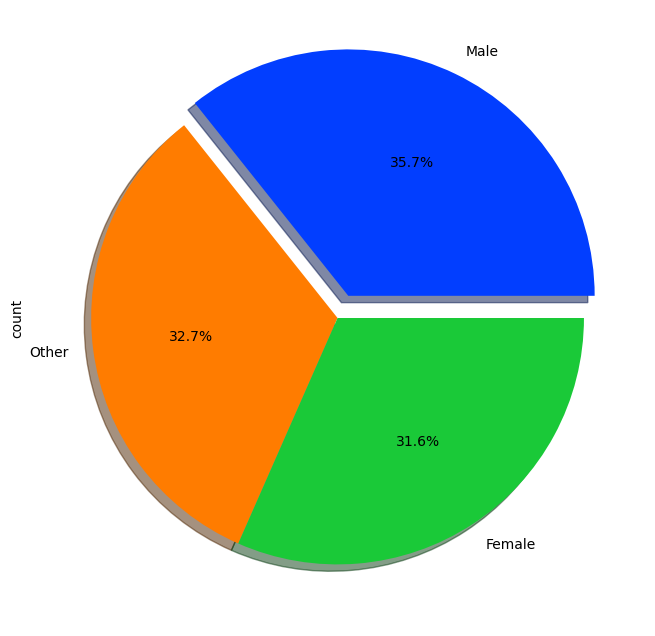

In [103]:
cust_df['gender'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('bright'));

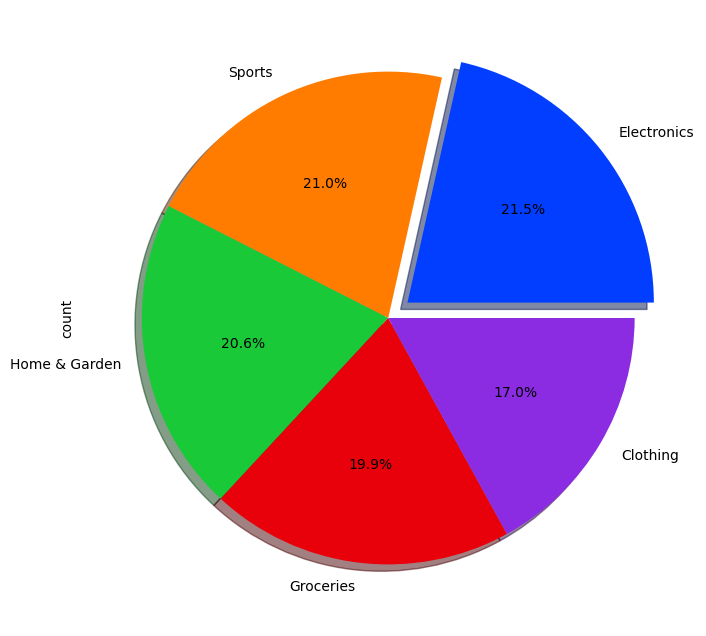

In [119]:
cust_df['preferred_category'].value_counts().plot.pie(explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('bright'));

In [131]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(cust_df[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = cust_df[i][(cust_df[i] > ul) | (cust_df[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [133]:
detect_outliers(numerical)

*** id outlier points*** 
 Series([], Name: id, dtype: int64) 

*** age outlier points*** 
 Series([], Name: age, dtype: int64) 

*** income outlier points*** 
 Series([], Name: income, dtype: int64) 

*** spending_score outlier points*** 
 Series([], Name: spending_score, dtype: int64) 

*** membership_years outlier points*** 
 Series([], Name: membership_years, dtype: int64) 

*** purchase_frequency outlier points*** 
 Series([], Name: purchase_frequency, dtype: int64) 

*** last_purchase_amount outlier points*** 
 Series([], Name: last_purchase_amount, dtype: float64) 



The output suggests that there are no outliers present in the dataset.

Next we convert the categorical features into numerical by assigning numbers.
The features 'Gender' has Male, female and others and that has been mapped to 0,1,2 respectively.
Similarly the five categories of preferred_category are Electronics, Clothing, Sports, Groceries and Home and Garden are assigned numbers 0,1,2,3,4 respectively.

In [147]:
cust_df['gender'] = cust_df['gender'].map({'Male':0,'Female':1, 'Other':2})
cust_df['preferred_category'] = cust_df['preferred_category'].map({'Electronics':0,'Clothing':1, 'Sports':2 , 'Groceries':3 , 'Home & Garden' :4})

In [149]:
cust_df.dtypes

id                        int64
age                       int64
gender                    int64
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category        int64
last_purchase_amount    float64
dtype: object

In [151]:
cust_df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,1,99342,90,3,24,3,113.53
1,2,21,1,78852,60,2,42,2,41.93
2,3,60,1,126573,30,2,28,1,424.36
3,4,40,2,47099,74,9,5,4,991.93
4,5,65,1,140621,21,3,25,0,347.08


In [155]:
cust_old = cust_df.copy()

In [163]:
cust_df = cust_df.drop('id' , axis = 1)

We have dropped `ID` from the features because it adds no meaning in our analysis.

In [165]:
scaler = StandardScaler()
cust_df = pd.DataFrame(scaler.fit_transform(cust_df), columns = cust_df.columns)

In [167]:
cust_df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,-0.384644,0.036298,0.316868,1.358468,-0.865010,-0.182348,0.690263,-1.281540
1,-1.515362,0.036298,-0.282016,0.321865,-1.215358,1.082005,-0.007677,-1.523763
2,1.078639,0.036298,1.112778,-0.714738,-1.215358,0.098620,-0.705618,-0.230005
3,-0.251618,1.246221,-1.210096,0.805613,1.237080,-1.516943,1.388203,1.690080
4,1.411203,0.036298,1.523374,-1.025718,-0.865010,-0.112106,-1.403558,-0.491443


# Dimensionality Reduction

In [170]:
pca = PCA()
pca.fit(cust_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [172]:
cumsum

array([0.14410159, 0.28197344, 0.41574216, 0.5403433 , 0.66317582,
       0.77910166, 0.89160516, 1.        ])

In [174]:
threshold_variance = 0.95
c_components = np.argmax(cumsum >= threshold_variance) + 1

print(f"Number of components to retain for {threshold_variance * 100}% variance: {c_components}")


Number of components to retain for 95.0% variance: 8


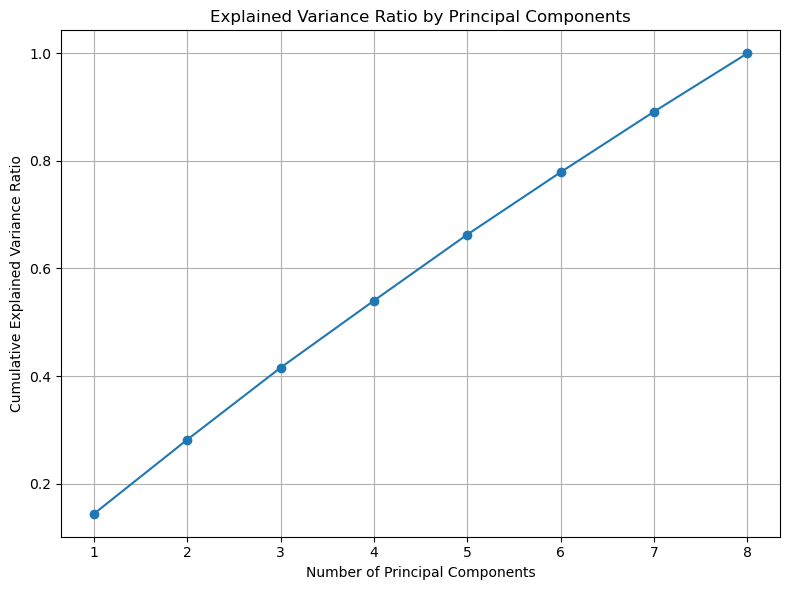

In [176]:
num_components = len(cumsum)
components = np.arange(1, num_components + 1)

# Plotting the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(components, cumsum, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(components)
plt.grid(True)
plt.tight_layout()
plt.show()

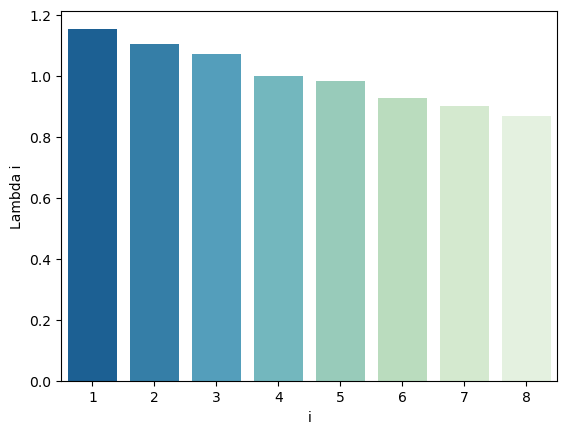

In [184]:
sns.barplot(x = list(range(1,9)), y = pca.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');

After performing PCA on the dataset, we determined that retaining `8` components is necessary to preserve up to 95% of the variance, as indicated by the cumulative variance ratio.

# Clustering

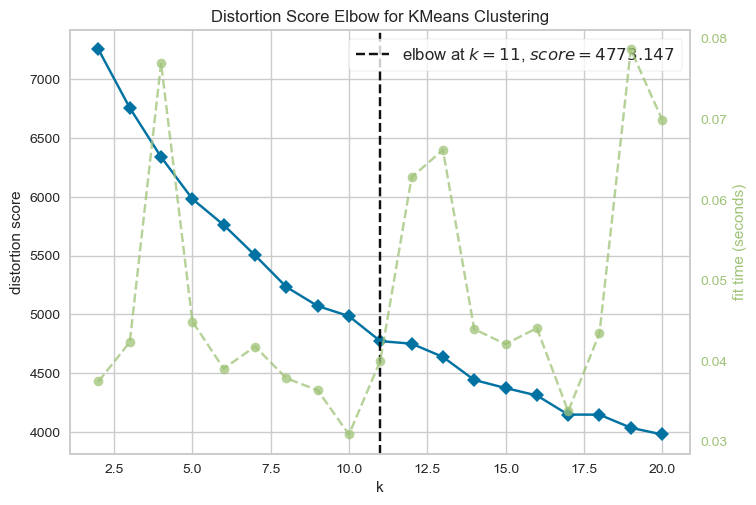

In [201]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(cust_df)
Elbow_M.show();

The plot above clearly indicates that the optimal value of K for KMeans clustering is `11`. We will use this value to train the Agglomerative Clustering model. Thereafter we add the cluster column to the dataset.

In [327]:
kmeans = KMeans(n_clusters = 11)
kmeans.fit(cust_df)


KMeans(n_clusters=11)

In [341]:
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers)
print(cluster_centers_df)

           0         1         2         3         4         5         6  \
0   0.549862 -0.992137 -0.752192  0.189698  0.702799  0.317247 -0.539857   
1  -0.319794 -0.810649  0.218446 -0.686663  0.492590 -0.277174  0.088289   
2   0.850595  0.871721 -0.770396  0.189822 -0.593907  0.354501 -0.381574   
3  -0.496744 -0.888138 -0.118671 -0.151400 -0.333583  0.400896  0.988260   
4  -0.400192 -0.042269 -0.527865  0.669194 -0.118814 -1.090018  0.119221   
5  -0.998106  0.392793 -0.358714  0.406398  0.420643  0.599093 -0.531133   
6  -0.018402 -0.637584  0.502878  0.347671 -0.754140  0.730796  0.628420   
7   0.618222  0.600929 -0.642184 -0.496667  0.407922 -0.514045  0.798832   
8  -0.840194  0.116198  0.430492 -0.048117 -0.693141 -0.624341 -0.745124   
9   0.924498  0.554836  0.859240 -0.192597 -1.120820 -0.679615  0.202813   
10  0.525632  0.416559  0.836437 -0.180640  0.806652  0.326404 -0.177177   

           7             8  
0   0.475973  6.937500e+00  
1  -0.881250  1.000000e+00  


In [409]:
cluster_sizes = cust_df['Clusters'].value_counts().sort_values(ascending =False)
print(cluster_sizes)


Clusters
0     128
1     122
5     106
2     102
3     100
10     89
8      82
6      73
7      72
4      71
9      55
Name: count, dtype: int64


In [203]:
AC = AgglomerativeClustering(n_clusters=11)
# fit model and predict clusters
yhat_AC = AC.fit_predict(cust_df)
cust_df['Clusters'] = yhat_AC
cust_old['Clusters'] = yhat_AC

In [207]:
cust_df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Clusters
0,-0.384644,0.036298,0.316868,1.358468,-0.865010,-0.182348,0.690263,-1.281540,2
1,-1.515362,0.036298,-0.282016,0.321865,-1.215358,1.082005,-0.007677,-1.523763,3
2,1.078639,0.036298,1.112778,-0.714738,-1.215358,0.098620,-0.705618,-0.230005,9
3,-0.251618,1.246221,-1.210096,0.805613,1.237080,-1.516943,1.388203,1.690080,6
4,1.411203,0.036298,1.523374,-1.025718,-0.865010,-0.112106,-1.403558,-0.491443,9


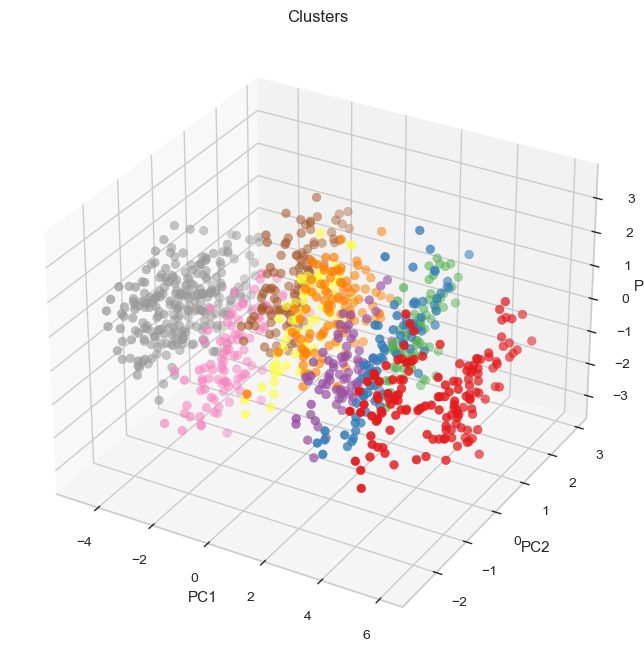

In [221]:
pca1 = PCA(n_components=3)
pca_result = pca1.fit_transform(cust_df)

# Create a DataFrame for the PCA result
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# If you have a 'Clusters' column for coloring the points
pca_df['Clusters'] = cust_df['Clusters']

# Now plot the PCA result in 3D
fig = plt.figure(figsize=(13, 8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], s=40, c=pca_df['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

We performed PCA to identify the 3 most important components, allowing us to create a 3D clustering plot.

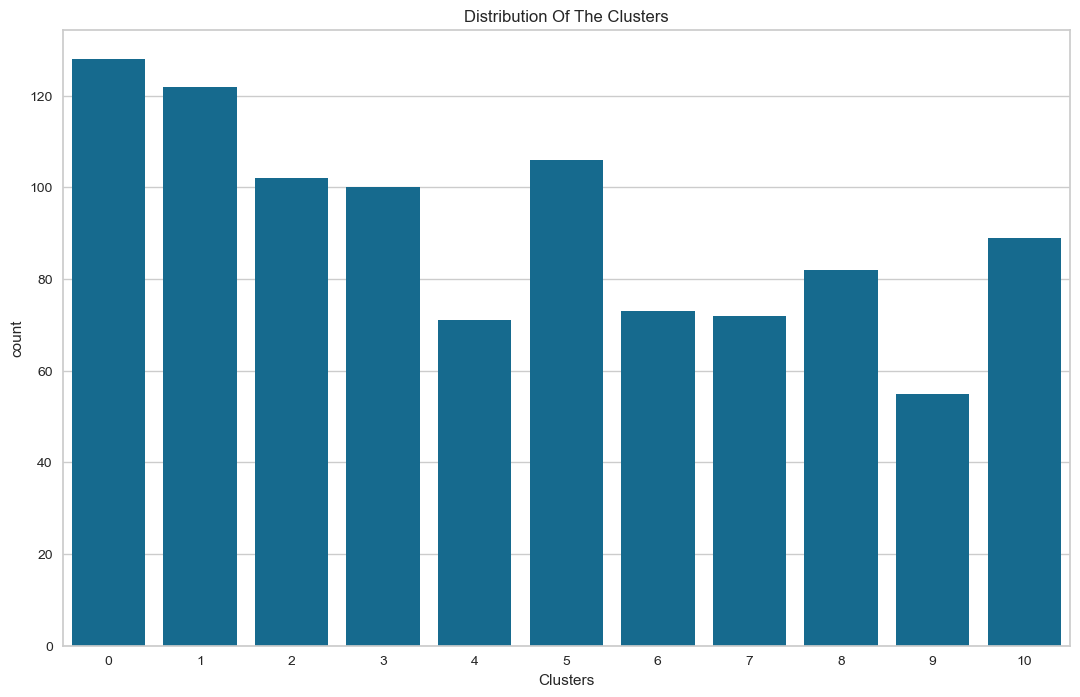

In [223]:
plt.figure(figsize=(13,8))
pl = sns.countplot(x=cust_df['Clusters'])
pl.set_title('Distribution Of The Clusters')
plt.show()

We observe that cluster 0 has the highest number of customers.
Thereafter we analyse the income and spending of the customers.

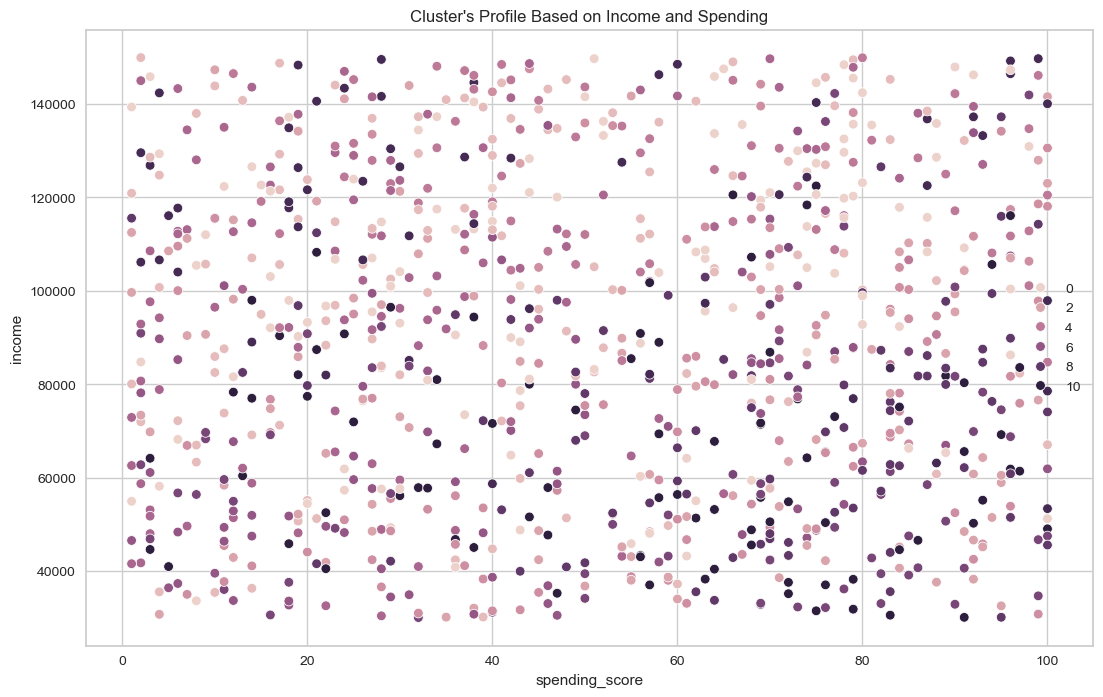

In [245]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=cust_old, x=cust_old['spending_score'], y=cust_old['income'], hue=cust_old['Clusters'])
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

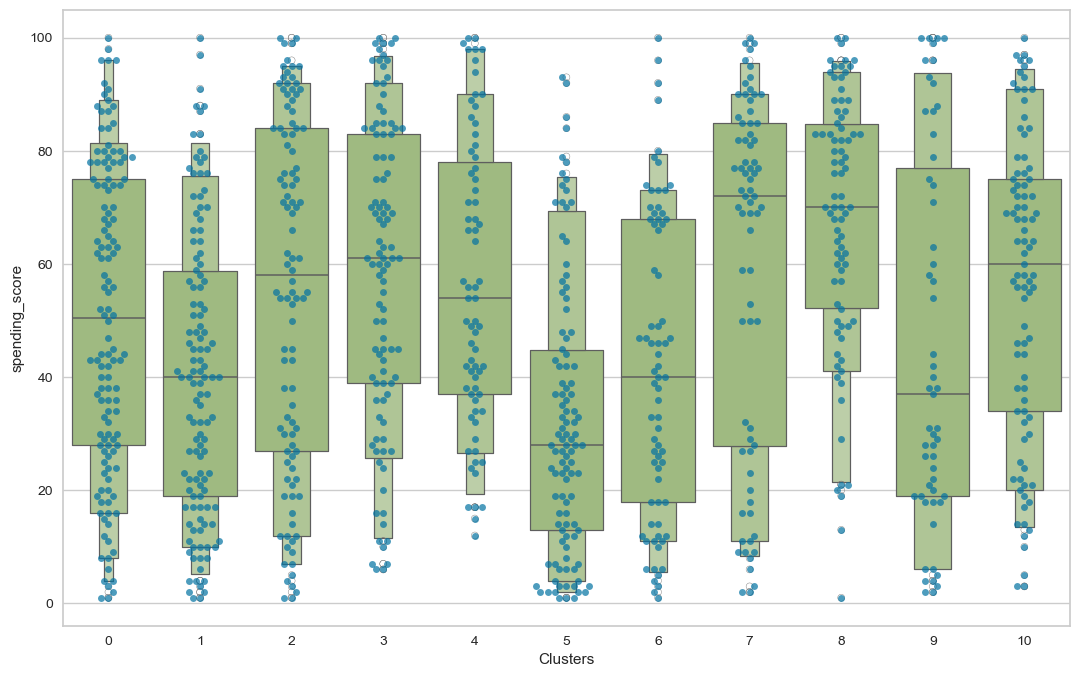

In [235]:
plt.figure(figsize=(13,8))
pl = sns.swarmplot(x=cust_old['Clusters'], y=cust_old['spending_score'], alpha=0.7)
pl = sns.boxenplot(x=cust_old['Clusters'], y=cust_old['spending_score'])
plt.show();
     

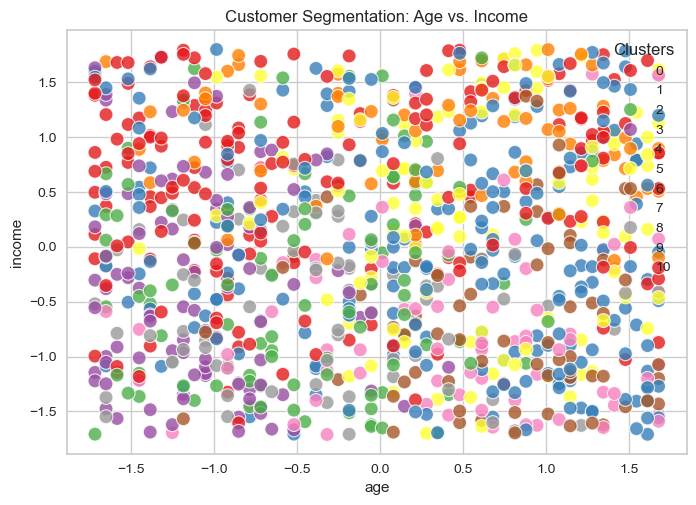

In [359]:
sns.scatterplot(x='age', y='income', hue='Clusters', data=cust_df, palette='Set1', s=100, alpha=0.8)
plt.title('Customer Segmentation: Age vs. Income')
plt.show()

In [462]:
cluster_top4 = pd.DataFrame(cluster_sizes)[:4]
cluster_top4

,count
Clusters,
0,128
1,122
5,106
2,102


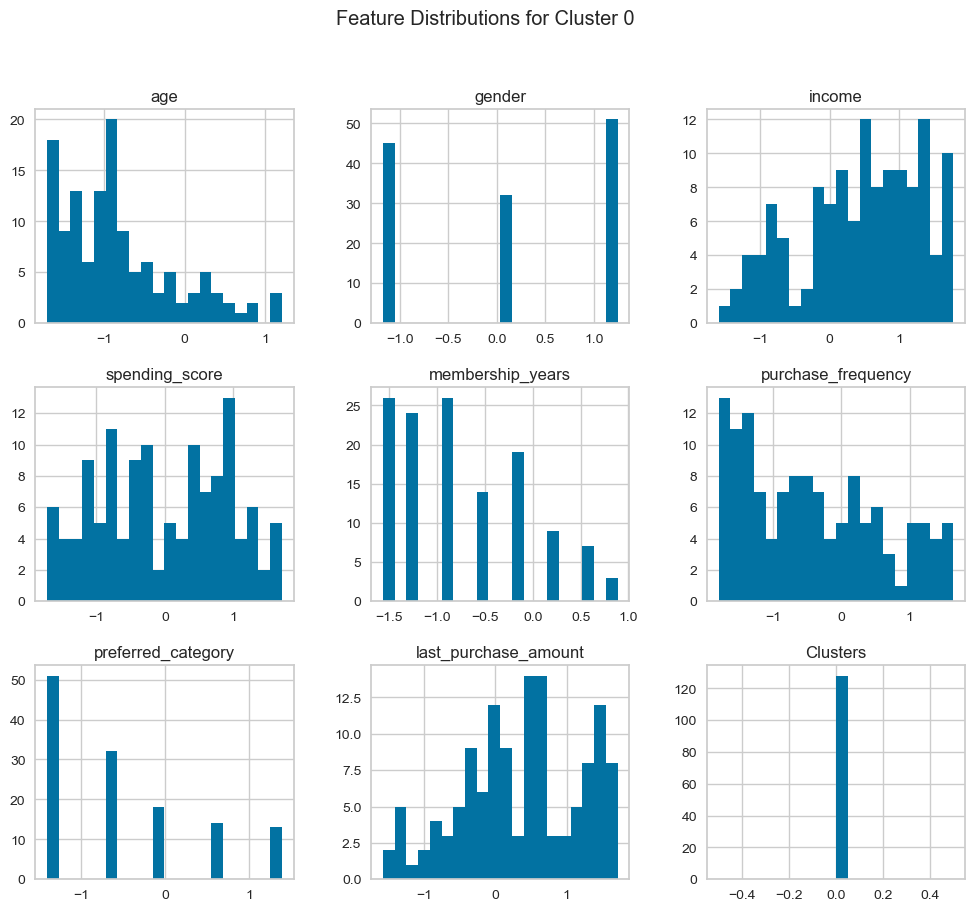

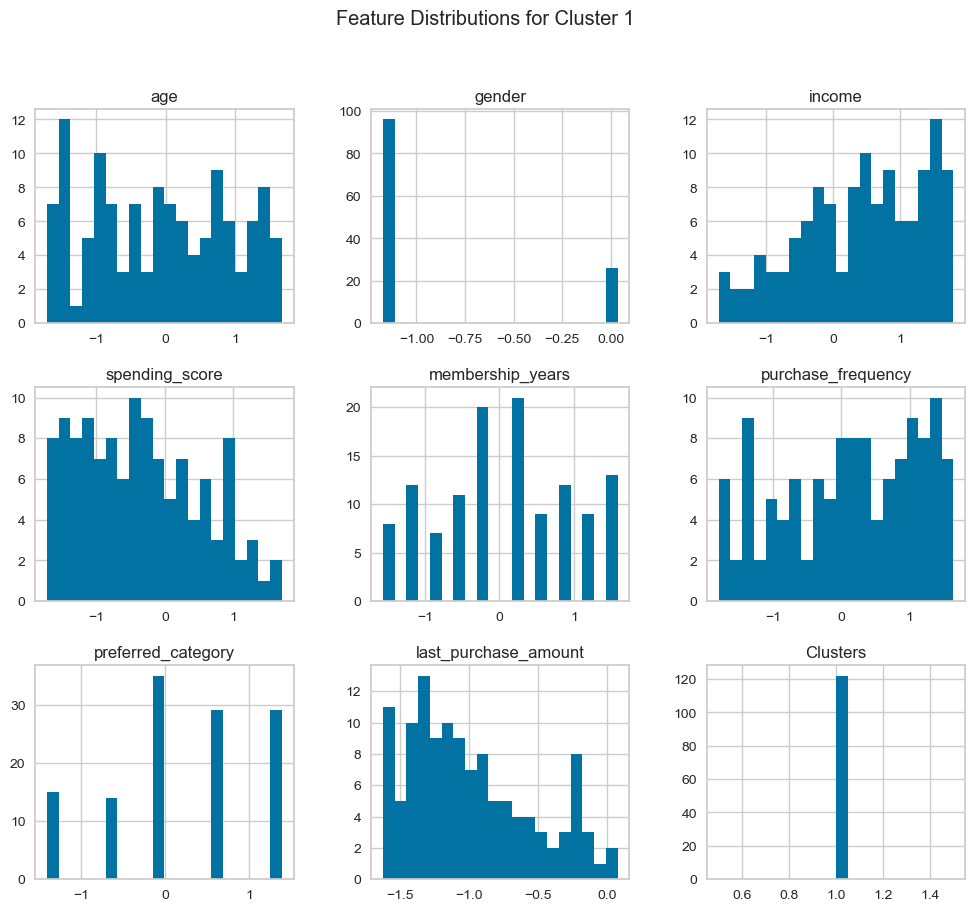

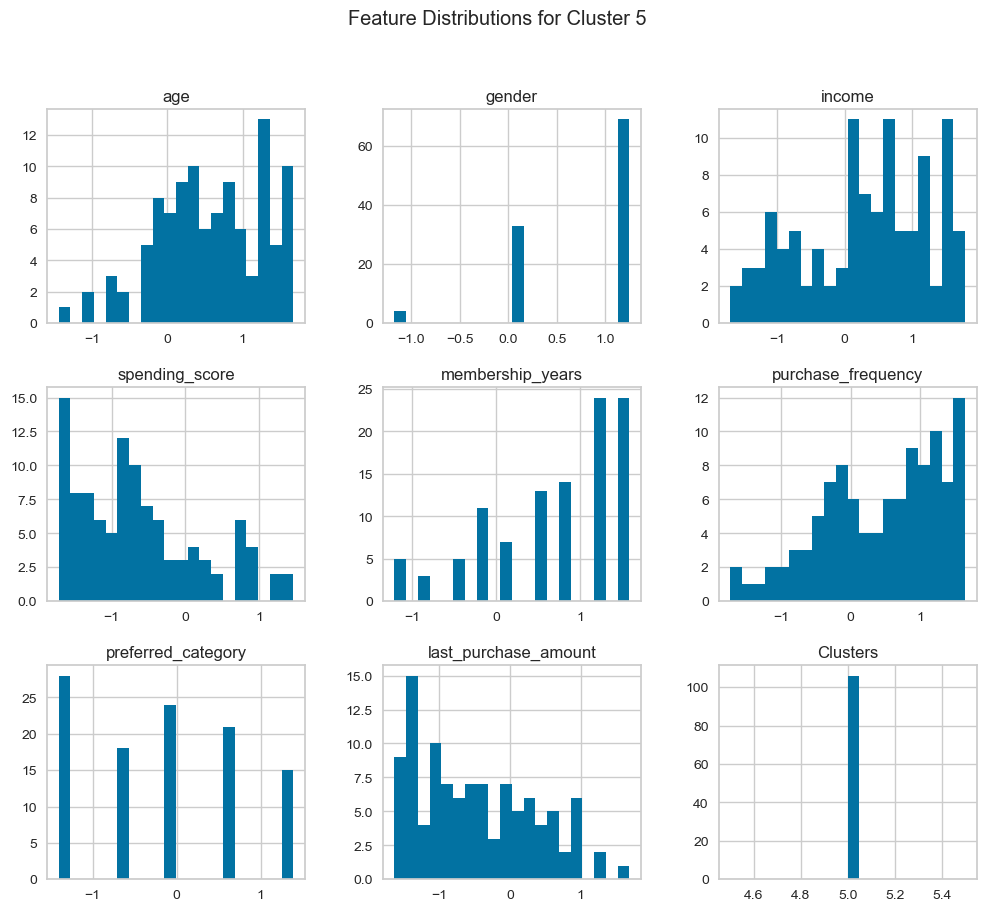

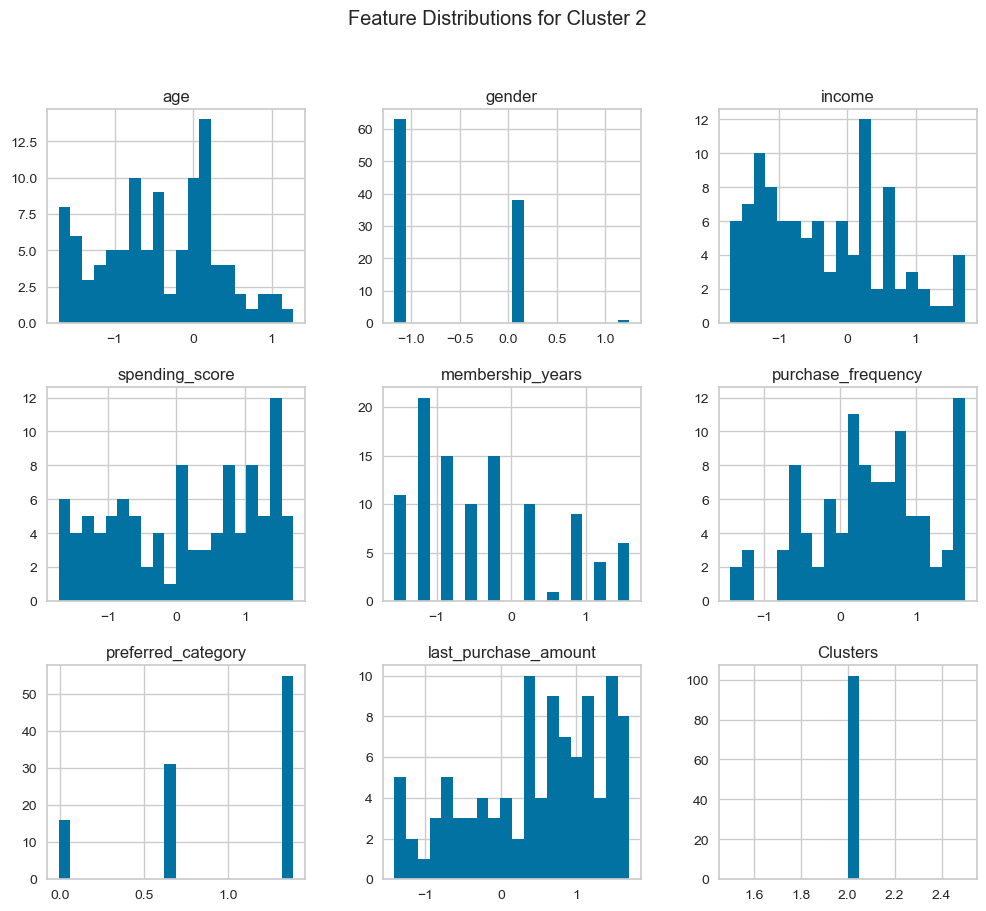

In [470]:
for i in [0,1,5,2]:
    cluster_indices = (cust_df['Clusters'] == i)
    cluster_data = cust_df[cluster_indices]
    
    cluster_descriptive_stats = cluster_data.describe()
    cluster_mean = cluster_data.mean()
    
    # Visualize feature distributions
    cluster_data.hist(figsize=(12, 10), bins=20)
    plt.suptitle(f'Feature Distributions for Cluster {i}')
    plt.show()

# Insights
Based on analysis of top 4 Clusters

1. `Cluster Distribution`: Cluster 0 exhibits the largest customer segment, indicating its prominence within the customer base.

2. `Demographic and Economic Profile`:
Customers in Cluster 0 are characterized by higher income levels and a younger demographic profile.

3. `Category Preferences`:
Electronics emerges as the primary preference among Cluster 0 customers, suggesting a strong affinity towards technology-related products.

4. `Gender and Income Dynamics`:
Cluster 1 predominantly comprises males and individuals of other genders with higher income levels.

5. `Preference for Sports`:
Sports products are notably favored within Cluster 1, indicating a preference for active lifestyle offerings.

6. `Diverse Consumer Profile`:
Cluster 5 showcases a diverse consumer profile, encompassing mostly females and individuals of other genders with higher incomes and older age groups.

7. `Multi-Category Preference`:
Customers in Cluster 5 demonstrate interest in both Electronics and Sports categories, reflecting a diverse range of consumer preferences.

8. `Broad Interest Spectrum`:
Cluster 2 captures a customer segment with mixed gender representation and relatively lower income levels.

9. `Varied Category Preferences`:
Despite lower incomes, customers in Cluster 2 exhibit interests across Home & Garden, Sports, and Electronics categories, indicating diverse consumption behaviors.